In [1]:
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd # data processing
import re, string, nltk
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup

In [2]:
data = pd.read_excel("TrainEcuadorFinal.xlsx")

#print head
data.head()

,tweetid,user,content,value,country,Polarity_Rating,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,como sabe la nutella,N,Ecuador,Negative,NaN,NaN,NaN,NaN
1,NaN,NaN,copia barata PA PA.. xd,N,Ecuador,Negative,NaN,Positive,1271.0,0.455882
2,NaN,NaN,copiiiii pasteee!!!,N,Ecuador,Negative,NaN,Negative,128.0,0.045911
3,NaN,NaN,Diana Novillo A penas y comparto par cosas de ...,N,Ecuador,Negative,NaN,Neutral,1389.0,0.498207
4,NaN,NaN,Es aquello que nl puedo poseer,N,Ecuador,Neutral,NaN,NaN,2788.0,NaN


In [1]:
data_clean = data.copy()
data_clean['content_clean'] = data_clean['content'].apply(lambda x: BeautifulSoup(x, "lxml").text)
data_clean = data_clean.loc[:, ['content_clean', 'Polarity_Rating']]
data_clean.head()

NameError: name 'pd' is not defined

In [4]:
data_clean['content_clean'] = data_clean['content_clean'].apply(lambda x: re.split('https:\/\/.*', str(x))[0]) #elimina url

In [5]:
data_clean['content_clean'] = data_clean['content_clean'].apply(lambda x: re.split('\d+', str(x))[0]) #elimina palabras con numeros

In [6]:
#elimina palabras con letras repetidas
def conti_rep_char(str1):
    tchr = str1.group(0)
    if len(tchr) > 1:
      return tchr[0:1]
      
def check_unique_char(rep, sent_text):
    
    convert = re.sub(r'(\w)\1+', 
                     rep,
                     sent_text)
      
    # returing the converted word
    return convert
  
data_clean['content_clean'] = data_clean['content_clean'].apply(
                                   lambda x : check_unique_char(conti_rep_char,
                                                              x))
# show Dataframe
data_clean

,content_clean,Polarity_Rating
0,como sabe la nutela,Negative
1,copia barata PA PA.. xd,Negative
2,copi paste!!!,Negative
3,Diana Novilo A penas y comparto par cosas de S...,Negative
4,Es aquelo que nl puedo poser,Neutral
...,...,...
2783,#RetoLaFavorita Aroz con huevo Sopa de camar...,Positive
2784,#NUESTRARECETALAFAVORITA MI SUEÑO ES PODER A ...,Neutral
2785,#NuestraRecetaLaFavorita Nuestro sueño en fami...,Neutral
2786,Uy que emoción desde hoy estaré muchísimo más ...,Positive


In [7]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [8]:
import emoji

def get_mentions_processing(text):
    return " ".join(filter(lambda x:x[0]!='@', text.split())) #no mentions

def get_hashtags_processing(text):
    return " ".join(filter(lambda x:x[0]!='#', text.split())) #no hashtags

def get_emojis_processing(text):
    return str(emoji.demojize(text,language='es')).replace(":"," ") #emojis a texto

def get_less3words_processing(text):
    return ' '.join([word for word in text.split() if len(word)>2]) #palabras con menos de 3 caracteres

def get_text_processing(text):
    stpword = stopwords.words('spanish')
    no_punctuation = [char for char in text if char not in string.punctuation] #elimina puntuacion
    no_punctuation = ''.join(no_punctuation).lower() #convierte en minuscula
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword]) #elimina stopwords

In [9]:
from nltk.corpus import stopwords
nltk.download('stopwords')
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
df1 = pd.DataFrame()
df1 = data_clean
df1['content_clean'] = data_clean['content_clean']
df1['Content_Review'] = data_clean['content_clean'].apply(get_mentions_processing)
df1['Content_Review1'] = df1['Content_Review'].apply(get_hashtags_processing)
df1['Content_Review2'] = df1['Content_Review1'].apply(get_emojis_processing)
df1['Content_Review3'] = df1['Content_Review2'].apply(get_text_processing)
df1['Content_Review4'] = df1['Content_Review3'].apply(get_less3words_processing)
df1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gpulg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,content_clean,Polarity_Rating,Content_Review,Content_Review1,Content_Review2,Content_Review3,Content_Review4
0,"¡No sabía, que increíble!",Positive,"¡No sabía, que increíble!","¡No sabía, que increíble!","¡No sabía, que increíble!",¡no sabía increíble,¡no sabía increíble
1,Se pone os fréjoles en remojo en una solución...,Neutral,Se pone os fréjoles en remojo en una solución ...,Se pone os fréjoles en remojo en una solución ...,Se pone os fréjoles en remojo en una solución ...,pone fréjoles remojo solución agua alcalina el...,pone fréjoles remojo solución agua alcalina el...
2,Buenísima es la espera la favorita es genial ...,Positive,Buenísima es la espera la favorita es genial m...,Buenísima es la espera la favorita es genial m...,Buenísima es la espera la favorita es genial m...,buenísima espera favorita genial emociona favo...,buenísima espera favorita genial emociona favo...
3,¿Qué comes que adivinas? 😋😋😋😋,Neutral,¿Qué comes que adivinas? 😋😋😋😋,¿Qué comes que adivinas? 😋😋😋😋,¿Qué comes que adivinas? cara_saboreando_comi...,¿qué comes adivinas carasaboreandocomida caras...,¿qué comes adivinas carasaboreandocomida caras...
4,Aroz con huevo frito paela de camarones y empa...,Neutral,Aroz con huevo frito paela de camarones y empa...,Aroz con huevo frito paela de camarones y empa...,Aroz con huevo frito paela de camarones y empa...,aroz huevo frito paela camarones empanadas polo,aroz huevo frito paela camarones empanadas polo
...,...,...,...,...,...,...,...
2783,"Felicidades son los mejores y q,cumplan muchos...",Positive,"Felicidades son los mejores y q,cumplan muchos...","Felicidades son los mejores y q,cumplan muchos...","Felicidades son los mejores y q,cumplan muchos...",felicidades mejores qcumplan mas endulsando di...,felicidades mejores qcumplan mas endulsando di...
2784,Una comida rica para celebrar el paso a la ter...,Positive,Una comida rica para celebrar el paso a la ter...,Una comida rica para celebrar el paso a la ter...,Una comida rica para celebrar el paso a la ter...,comida rica celebrar paso tercera edad ¡ ansio...,comida rica celebrar paso tercera edad ansioso...
2785,Domenica Alvear Para cuando mejora? 💕,Neutral,Domenica Alvear Para cuando mejora? 💕,Domenica Alvear Para cuando mejora? 💕,Domenica Alvear Para cuando mejora? dos_coraz...,domenica alvear mejora doscorazones,domenica alvear mejora doscorazones
2786,Helo #LAFAVORITA me encantan como salen las pa...,Positive,Helo #LAFAVORITA me encantan como salen las pa...,Helo me encantan como salen las papas fritas c...,Helo me encantan como salen las papas fritas c...,helo encantan salen papas fritas camarones apa...,helo encantan salen papas fritas camarones apa...


In [10]:
df2 = pd.DataFrame()
df2 = df1
df2 = df1[['Content_Review4', 'Polarity_Rating']]
df2.head()

,Content_Review4,Polarity_Rating
0,¡no sabía increíble,Positive
1,pone fréjoles remojo solución agua alcalina el...,Neutral
2,buenísima espera favorita genial emociona favo...,Positive
3,¿qué comes adivinas carasaboreandocomida caras...,Neutral
4,aroz huevo frito paela camarones empanadas polo,Neutral


In [11]:
# Elimino registros con Answers NaN
df2['Content_Review4'] = df2['Content_Review4'].replace('', np.nan) # Reemplazo los registros vacíos con NaN
print(df2['Content_Review4'].isna().sum()) 
df2 = df2.dropna(axis=0, subset=['Content_Review4'])
print(df2.shape)
df2

48
(2740, 2)


<ipython-input-11-178ae3d6fd43>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Content_Review4'] = df2['Content_Review4'].replace('', np.nan) # Reemplazo los registros vacíos con NaN


,Content_Review4,Polarity_Rating
0,¡no sabía increíble,Positive
1,pone fréjoles remojo solución agua alcalina el...,Neutral
2,buenísima espera favorita genial emociona favo...,Positive
3,¿qué comes adivinas carasaboreandocomida caras...,Neutral
4,aroz huevo frito paela camarones empanadas polo,Neutral
...,...,...
2783,felicidades mejores qcumplan mas endulsando di...,Positive
2784,comida rica celebrar paso tercera edad ansioso...,Positive
2785,domenica alvear mejora doscorazones,Neutral
2786,helo encantan salen papas fritas camarones apa...,Positive


In [12]:
print(df2['Polarity_Rating'].value_counts())

Neutral     1363
Positive    1249
Negative     128
Name: Polarity_Rating, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df2, test_size=0.3, random_state=42)
X_train = train['Content_Review4'].values
X_test = test['Content_Review4'].values
y_train = train['Polarity_Rating']
y_test = test['Polarity_Rating']

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1918,)
(822,)
(1918,)
(822,)


In [15]:
vect1 = CountVectorizer()
X_train = vect1.fit_transform(X_train)
X_test = vect1.transform(X_test)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1918, 4497)
(822, 4497)
(1918,)
(822,)


In [17]:
print(vect1.get_feature_names()) #one hot encoding?

['abajo', 'abastecer', 'abc', 'abi', 'ablandar', 'ablande', 'abra', 'abrazar', 'abrazitos', 'abrazos', 'abre', 'abrimos', 'abrir', 'absolutamente', 'abu', 'abuela', 'abuelita', 'acaba', 'acabaron', 'academia', 'academialafavorita', 'acampando', 'aceder', 'aceite', 'aceiteachote', 'aceitegirasol', 'aceites', 'aceité', 'acentuar', 'aceptan', 'acepto', 'aceptó', 'acerque', 'acertada', 'acesible', 'aceso', 'acesorios', 'achaquen', 'achiote', 'achiotes', 'achote', 'achotito', 'achoto', 'acides', 'aclaración', 'acogido', 'acogjida', 'acompaña', 'acompañada', 'acompañado', 'acompañados', 'acompañan', 'acompañandonos', 'acompañante', 'acompañar', 'acompañarlo', 'acompañat', 'acompañe', 'acompaño', 'acompañó', 'aconpanñadas', 'acostarce', 'acostarme', 'actividad', 'actividades', 'actual', 'acuerdo', 'acá', 'adela', 'adelante', 'adelanto', 'ademas', 'además', 'aderesos', 'aderezo', 'aderezos', 'adhiera', 'adicta', 'adictivo', 'adios', 'adivinamos', 'adivinas', 'administrativa', 'admirable', 'adm

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1918, 4497)
(822, 4497)
(1918,)
(822,)


In [20]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
svd.fit(X_train)

TruncatedSVD(n_components=5, n_iter=7, random_state=42)

In [21]:
svd = TruncatedSVD(n_components=4000, n_iter=7, random_state=42)
svd.fit(X_train)
percent_variance_retained = svd.explained_variance_ / np.sum(svd.explained_variance_)
cumulative_variance_retained = np.cumsum(percent_variance_retained)

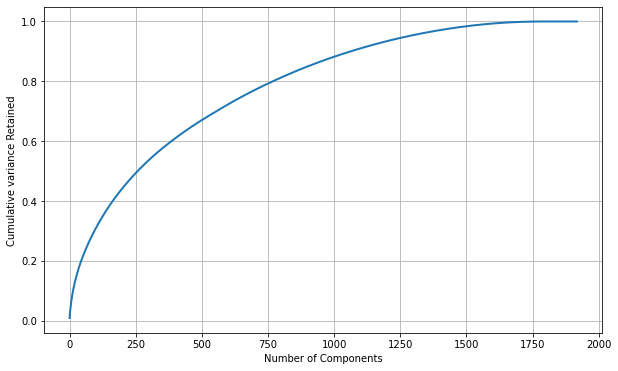

In [22]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(10, 6))
plt.clf()
plt.plot(cumulative_variance_retained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance Retained')
plt.show()

In [30]:
NComponents = 800
svd = TruncatedSVD(n_components=NComponents, n_iter=7, random_state=42)
X_svd_train = svd.fit_transform(X_train)
X_svd_test = svd.transform(X_test)

In [31]:
print(X_svd_train.shape)
print(X_svd_test.shape)
print(y_train.shape)
print(y_test.shape)

(1918, 800)
(822, 800)
(1918,)
(822,)


In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
svc=SVC(kernel='poly',C=0.1, degree=3, coef0=0.0, class_weight='balanced')
scores = cross_val_score(svc, X_svd_train, y_train, cv=3, scoring='accuracy')
svc = SGDClassifier(max_iter=7)
svc.fit(X_svd_train, y_train)

C:\Users\gpulg\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=7)

In [33]:
# accuracy on testing
svc.score(X_svd_test, y_test)

0.781021897810219

In [34]:
predicted_sentiments = svc.predict(X_svd_test)
predicted_sentiments

array(['Neutral', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Neutral',
       'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Positive', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive',
       'Positive', 'Negative', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Neutral', 'Positive', 'Neutral', 'Negative', 'Neutral',
       'Neutral', 'Neutral', 'N

In [35]:
report = metrics.classification_report(y_true=y_test, 
                                           y_pred=predicted_sentiments, 
                                           labels=['Positive', 'Negative', 'Neutral'])
print(report)

              precision    recall  f1-score   support

    Positive       0.81      0.79      0.80       388
    Negative       0.50      0.33      0.40        39
     Neutral       0.77      0.82      0.79       395

    accuracy                           0.78       822
   macro avg       0.69      0.65      0.66       822
weighted avg       0.78      0.78      0.78       822



Confusion matrix, without normalization
[[ 13  19   7]
 [  8 322  65]
 [  5  76 307]]
Normalized confusion matrix
[[0.33333333 0.48717949 0.17948718]
 [0.02025316 0.81518987 0.16455696]
 [0.0128866  0.19587629 0.79123711]]


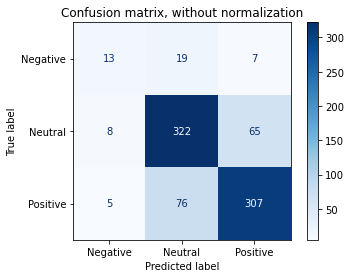

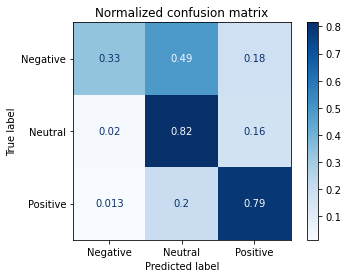

In [36]:
# Plot non-normalized confusion matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svc, X_svd_test, y_test,
                                 display_labels=['Negative', 'Neutral', 'Positive'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()